<a href="https://colab.research.google.com/github/TN1928/machinescreatemachines/blob/main/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/crimes_against_women_2001-2014.csv')

def create_holes(dataframe, column_name, hole_percentage = 10):
    """
    Создает "дыры" в указанной колонке заданного DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Исходный DataFrame.
        column_name (str): Имя колонки, в которой нужно создать "дыры".
        hole_percentage (float): Процент дырявости, который указывает, какую часть данных следует заменить на NaN.

    Returns:
        pd.DataFrame: DataFrame с "дырами" в указанной колонке.
    """
    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes

del_df = create_holes(df,'Dowry Deaths')
del_df


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.0,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.0,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.0,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.0,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.0,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,NaN,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,NaN,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0.0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1.0,20,7,3,0


In [23]:
#Удаление
df_cleaned = del_df.dropna()
df_cleaned

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.0,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.0,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.0,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.0,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.0,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10670,830,Delhi UT,West,2014,251,546,13.0,484,63,416,0
10671,831,Delhi UT,Total District(s),2014,2096,4034,153.0,4322,1361,3173,0
10674,834,Puducherry,Karaikal,2014,3,1,0.0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1.0,20,7,3,0


In [24]:
#Заполнение при помощи медианы
df_filled_median = del_df.fillna(del_df.median())

df_filled_median

<ipython-input-24-8a053b528e83>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = del_df.fillna(del_df.median())


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.0,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.0,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.0,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.0,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.0,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,5.0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,5.0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0.0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1.0,20,7,3,0


In [26]:
#Заполнение при помощи среднего
df_filled_mean = del_df.fillna(del_df.mean())

df_filled_mean

<ipython-input-26-7b3cf69d64d3>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = del_df.fillna(del_df.mean())


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.000000,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.000000,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.000000,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.000000,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.000000,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,20.389906,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,20.389906,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0.000000,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1.000000,20,7,3,0


In [27]:
#Заполнение при помощи моды
df_filled_mode = del_df.fillna(del_df["Dowry Deaths"].mode()[0])
"""
Мода возвращает объект Series, так как
значений моды может быть несколько
"""
df_filled_mode

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.0,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.0,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.0,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.0,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.0,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0.0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0.0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0.0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1.0,20,7,3,0


In [28]:
#Заполнение при помощи интерполяции
df_interpolated = del_df.interpolate()

df_interpolated

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.0,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.0,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.0,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.0,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.0,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,102.0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,51.0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0.0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1.0,20,7,3,0


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


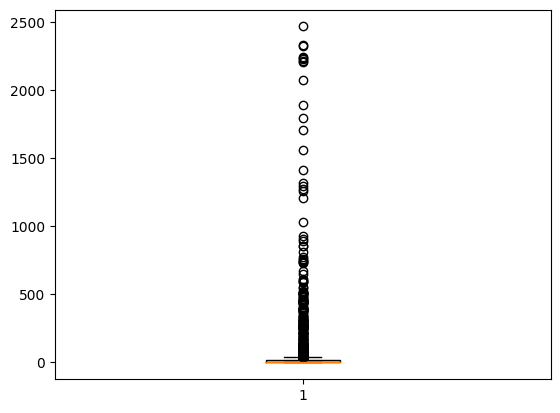

In [34]:
#Методом среднего
import matplotlib.pyplot as plt
df = df.dropna()
plt.boxplot(df["Dowry Deaths"])
#Выбросов нет
plt.show()

In [ ]:
#При помощи межквартильного размаха

In [ ]:
#Статистика и объяснение

**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [36]:
#Проверка на дубли
df.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000
mean,3878.278668,2007.710094,58.758065,70.948283,20.389906,115.644849,28.320812,214.426743,0.165557
std,2812.579899,4.039614,218.825012,318.611826,99.238326,470.922824,174.913884,938.767341,2.067837
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1016.250000,2004.000000,9.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3696.500000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,51.000000,0.000000
75%,6346.750000,2011.000000,44.000000,49.000000,16.000000,86.000000,12.750000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [37]:
df = pd.concat((df, df.loc[0:100]))

In [38]:
df.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,9698.000000,9698.000000,9698.000000,9698.000000,9698.000000,9698.000000,9698.000000,9698.000000,9698.000000
mean,3843.548360,2007.649206,58.605279,70.691483,20.342442,115.445040,28.511549,213.931945,0.166942
std,2823.218133,4.071276,218.155492,317.443870,98.884020,470.210164,175.722722,936.428221,2.063215
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,942.250000,2004.000000,9.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3646.500000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,51.000000,0.000000
75%,6322.750000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [39]:
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.0,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.0,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.0,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.0,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.0,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
96,96,BIHAR,MUNGER,2001,11,15,8.0,0,0,39,0
97,97,BIHAR,MUZAFFARPUR,2001,73,25,69.0,81,0,141,6
98,98,BIHAR,MUZAFFARPUR RLY.,2001,2,1,0.0,4,0,1,0
99,99,BIHAR,NALANDA,2001,40,12,47.0,14,2,54,0


In [40]:
#Удаление дублей
df_no_duplicates = df.drop_duplicates()
df_no_duplicates


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16.0,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7.0,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14.0,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17.0,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12.0,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10670,830,Delhi UT,West,2014,251,546,13.0,484,63,416,0
10671,831,Delhi UT,Total District(s),2014,2096,4034,153.0,4322,1361,3173,0
10674,834,Puducherry,Karaikal,2014,3,1,0.0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1.0,20,7,3,0


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

Масштабируйте категориальные признаки через OneHotEncoder

In [42]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])